# Impact of Gun Control Laws on Gun Violence Deaths

### Introduction

Gun violence remains a significant public health concern in the United States, prompting debates on the efficacy of gun control laws in mitigating such violence. This report aims to analyze whether stricter gun control laws correlate with reduced gun violence deaths.

In [201]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import matplotlib.colors as mcolors

### Data Sources

- Gun Violence Data: Obtained from the Centers for Disease Control and Prevention (CDC).
- Gun Control Laws: Derived from the Giffords Law Center, categorizing states into five tiers based on the stringency of their gun control laws. (https://giffords.org/lawcenter/resources/scorecard/)

In [202]:
us_states = gpd.read_file("https://www2.census.gov/geo/tiger/GENZ2020/shp/cb_2020_us_state_20m.zip")

# CDC API is down. Using the dataset from github
url = "https://github.com/Benson90/Data-608/raw/d6ef4cccf9e402d1bde940653abb75f5e929841a/firearm.csv"
df = pd.read_csv(url)

### Methodology

- Data Compilation: Gun violence death rates and gun control law categorizations were compiled and analyzed.
- Visualization: Utilized heatmaps on a US map to represent the distribution of gun control laws across states and their corresponding gun violence death rates.
- Statistical Analysis: Examined the relationship between the stringency of gun control laws and gun violence death rates.

In [203]:
likert_categories = {
    'Very Lax': ['ID', 'MT', 'WY', 'SD', 'KS','MO','AR','MS','KY','AZ'],
    'Lax': ['TX', 'AK', 'OK', 'ND', 'IA', 'LA', 'AL', 'TN', 'GA', 'WV'],
    'Moderate': ['UT', 'NE', 'WI', 'IN', 'OH', 'NC', 'SC', 'FL', 'ME', 'NH'],
    'Strict': ['OR', 'NV', 'NM', 'MN', 'MI', 'PA', 'VA', 'VT','DE','RI'],
    'Very Strict': ['WA', 'CA','CO','IL','NY','NJ','CT','MA','MD','HI']
}

In [204]:
def categorize_laws(state):
    for category, states in likert_categories.items():
        if state in states:
            return category
    return 'Unknown'  # If the state doesn't match any category


In [205]:

df['Gun Control Laws'] = df['STATE'].apply(categorize_laws)
merged = us_states.merge(df, left_on='STUSPS', right_on='STATE', how='left')


/var/folders/wr/lm1p5z3s07x_rf77nv7d_zdr0000gn/T/ipykernel_6246/1642118300.py:19: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(merged.geometry.centroid.x, merged.geometry.centroid.y, merged['STATE']):


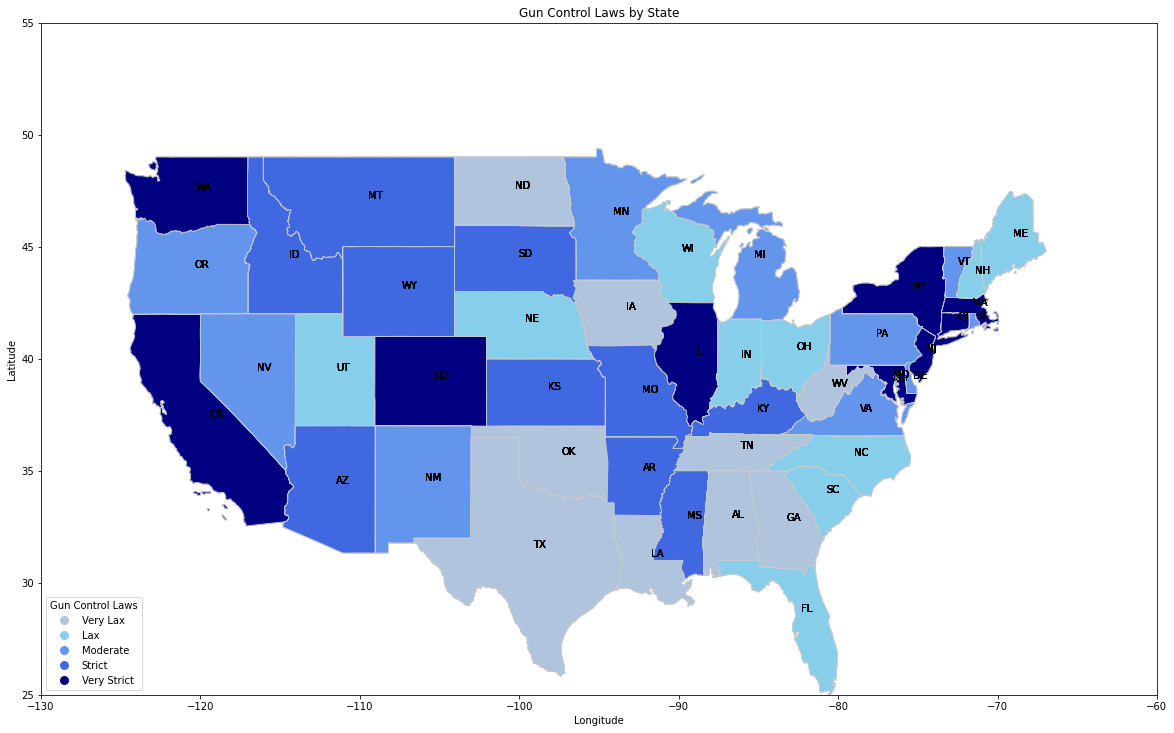

In [206]:
colors = {
    'Very Lax': '#B0C4DE',
    'Lax': '#87CEEB',
    'Moderate': '#6495ED',
    'Strict': '#4169E1',
    'Very Strict': '#000080'
}

# Create a custom colormap
cmap = mcolors.LinearSegmentedColormap.from_list('custom', list(colors.values()))

# Plot the map with the custom colormap
fig, ax = plt.subplots(figsize=(20, 15))
merged.plot(column='Gun Control Laws', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_xlim(-130, -60)  # Set the longitude range
ax.set_ylim(25, 55)  # Set the latitude range

# Add state labels with larger font size
for x, y, label in zip(merged.geometry.centroid.x, merged.geometry.centroid.y, merged['STATE']):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=10)  # Increase font size

# Add legend
legend_labels = list(colors.keys())
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor=colors[label]) for label in legend_labels]
ax.legend(legend_handles, legend_labels, loc='lower left', title='Gun Control Laws')

plt.title('Gun Control Laws by State')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

/var/folders/wr/lm1p5z3s07x_rf77nv7d_zdr0000gn/T/ipykernel_6246/3481260151.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(merged.geometry.centroid.x, merged.geometry.centroid.y, merged['STATE']):


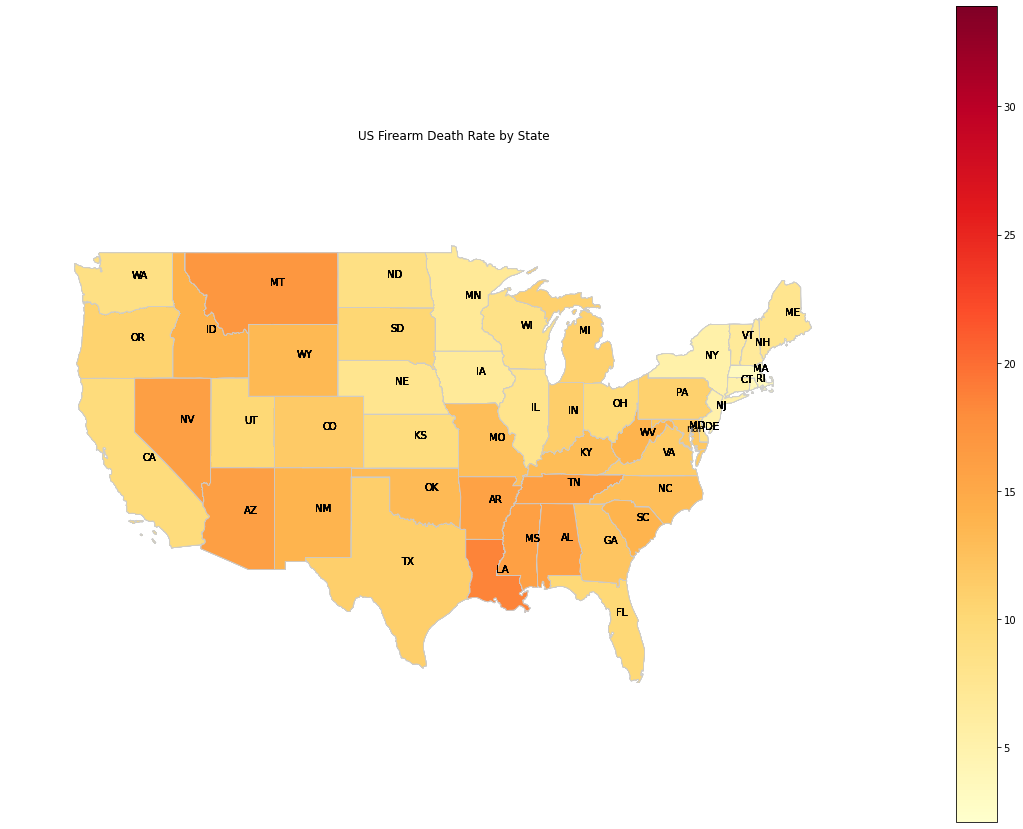

In [207]:
# Plot
fig, ax = plt.subplots(figsize=(20, 15))
merged.plot(column='RATE', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
for x, y, label in zip(merged.geometry.centroid.x, merged.geometry.centroid.y, merged['STATE']):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=10)  # Increase font size

    ax.set_xlim(-130, -60)  # Set the longitude range
ax.set_ylim(25, 55)  # Set the latitude range
ax.axis('off')
ax.set_title('US Firearm Death Rate by State')
plt.show()

In [208]:
def group_death_rate(rate):
    if rate >= 0 and rate < 7:
        return 'Very Low'
    elif rate >= 7 and rate < 14:
        return 'Low'
    elif rate >= 14 and rate < 21:
        return 'Moderate'
    elif rate >= 21 and rate < 28:
        return 'High'
    elif rate >= 28 and rate < 35:
        return 'Very High'

/var/folders/wr/lm1p5z3s07x_rf77nv7d_zdr0000gn/T/ipykernel_6246/1578334522.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021['Death Rate Range'] = df_2021['RATE'].apply(group_death_rate)


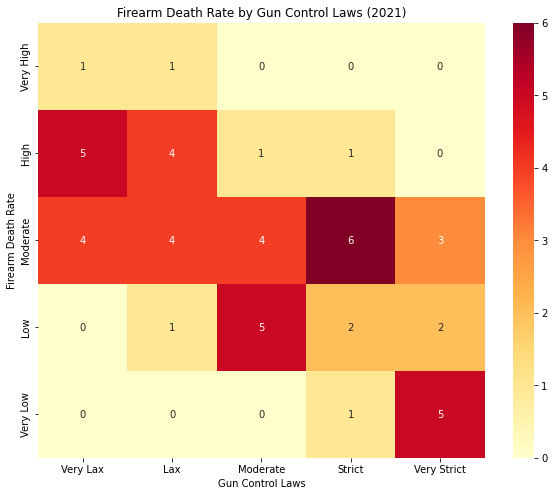

In [209]:
# Apply categorization to the dataframe
df_2021 = df[df['YEAR'] == 2021]
df_2021['Death Rate Range'] = df_2021['RATE'].apply(group_death_rate)

death_rate_order = ['Very High','High','Moderate','Low','Very Low']
gun_control_order = ['Very Lax', 'Lax', 'Moderate', 'Strict', 'Very Strict']


# Create a pivot table for the heatmap
pivot_table = df_2021.pivot_table(index='Death Rate Range', columns='Gun Control Laws', aggfunc='size', fill_value=0)
pivot_table = pivot_table.reindex(death_rate_order)
pivot_table = pivot_table[gun_control_order]
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, cmap='YlOrRd', annot=True, fmt='d')
plt.title('Firearm Death Rate by Gun Control Laws (2021)')
plt.xlabel('Gun Control Laws')
plt.ylabel('Firearm Death Rate')
plt.show()

### Conclusion

- Gun Violence Death Rates:
States with "Very Lax" gun control laws exhibited the highest gun violence death rates.
Conversely, states with "Very Strict" gun control laws demonstrated the lowest gun violence death rates.

- Relationship Analysis:
A clear inverse correlation was observed between the stringency of gun control laws and gun violence death rates.
States with stricter gun control laws tended to have lower rates of gun violence deaths.